### Proyecto de prediccion de probabilidad de aceptacion en la universidad mediante regresion lineal

In [52]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import sklearn.metrics as metrics
sbn.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [25]:
df=pd.read_csv("ds.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Primero ajusto los nombres de las columnas para facilitar el trabajo

In [26]:
df=df.drop("Serial No.",axis=1)
df.columns=["gre","toefl","urating","sop","lor","cgpa","research","chance"]
df

,gre,toefl,urating,sop,lor,cgpa,research,chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


### Reviso existencia de valores nulos o faltantes

In [5]:
df.isna().sum()

gre         0
toefl       0
urating     0
sop         0
lor         0
cgpa        0
research    0
chance      0
dtype: int64

### Reviso si hay valores faltantes camuflados o mal codificados

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gre       500 non-null    int64  
 1   toefl     500 non-null    int64  
 2   urating   500 non-null    int64  
 3   sop       500 non-null    float64
 4   lor       500 non-null    float64
 5   cgpa      500 non-null    float64
 6   research  500 non-null    int64  
 7   chance    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


,gre,toefl,urating,sop,lor,cgpa,research,chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


En este caso, reviso los rangos de los datos y los tipos de datos para ver si existen valores nulos con alguna codificacion particular pero parece no haber.

### Correlacion entre datos

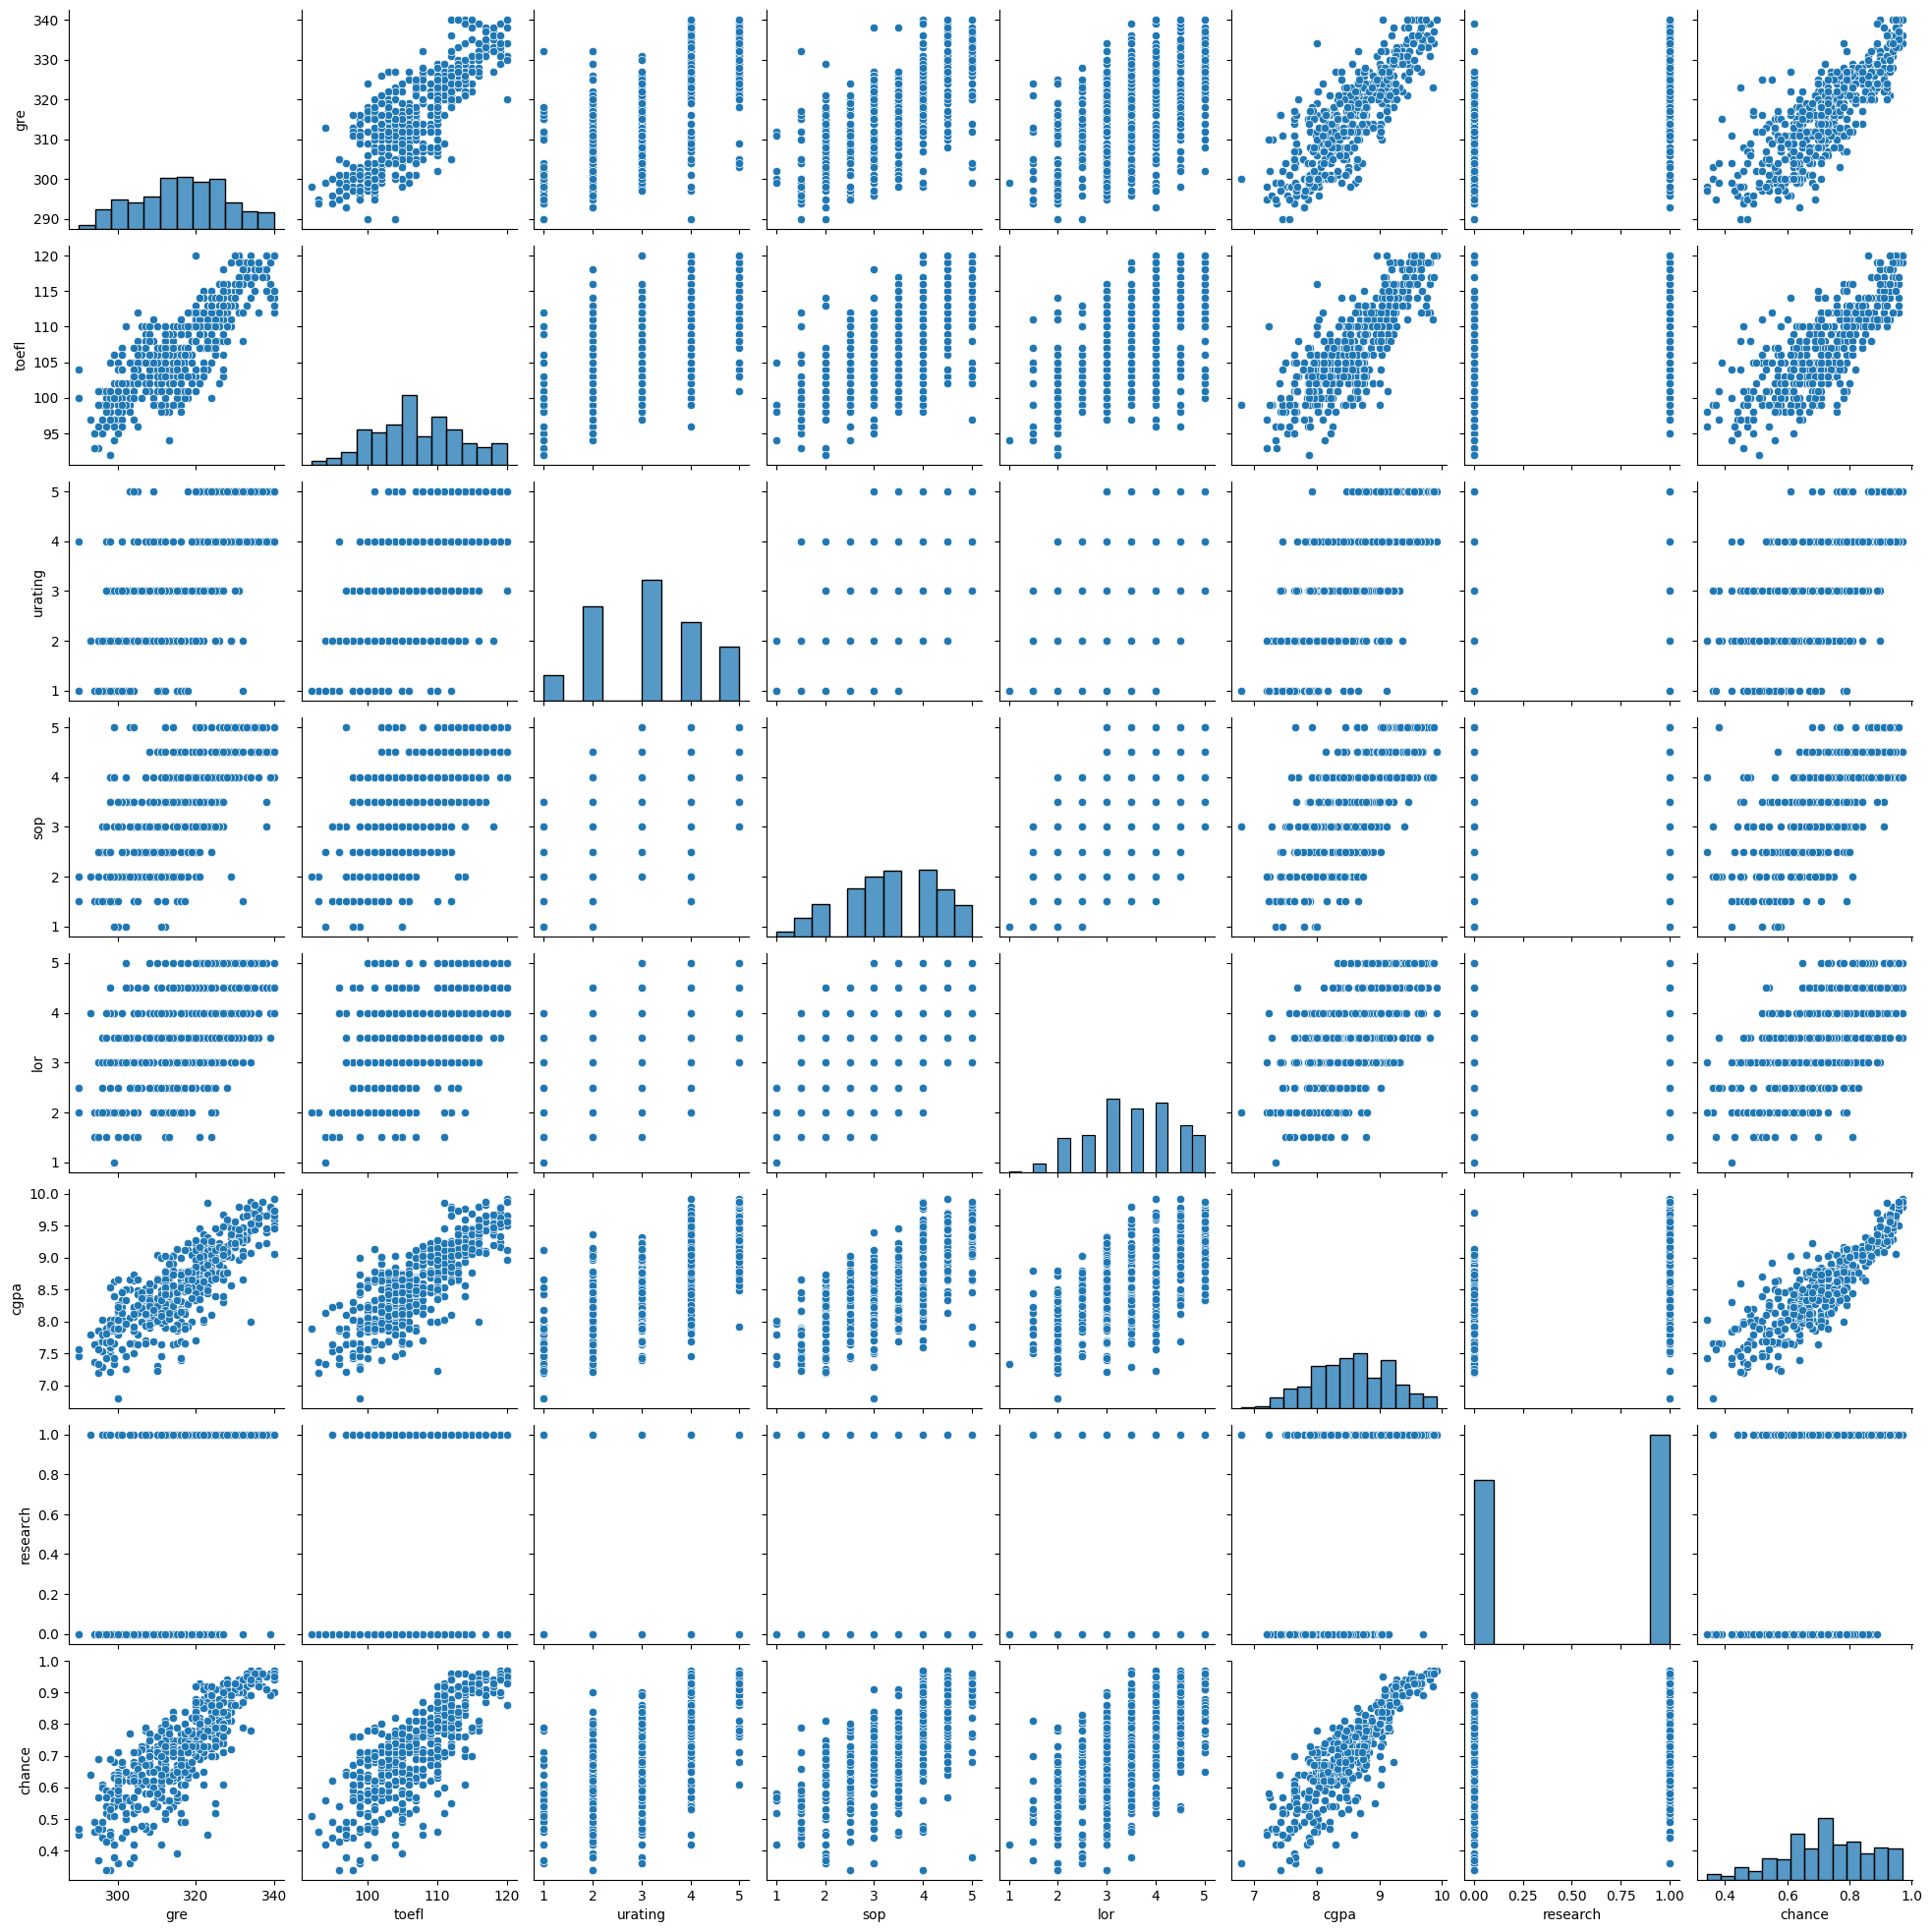

In [34]:
sbn.pairplot(data=df)

<Axes: >

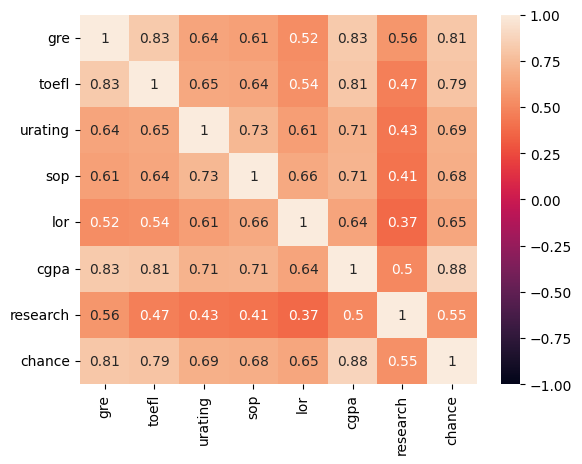

In [37]:
sbn.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

Dado que poseemos varias variables se realizará un analisis de regresión lineal múltiple

### Para la chance de aceptacion, vemos la mayor correlacion con las variables "gre", "toefl" y "cgpa"

Dada esta correlacion, para comenzar solo se seleccionará una de las variables

In [47]:
#Dado que la correlacion es alta entre las variables trabajo unicamente con "cgpa"
col=list(set(list(df.columns))-set(["chance","toefl","gre"]))
x=df[col].values
y=df["chance"].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_esc=StandardScaler().fit(x)
y_esc=StandardScaler().fit(y)

Escalo los conjuntos de entrenamiento y prueba

In [48]:
x_train=x_esc.transform(x_train)
x_test=x_esc.transform(x_test)
y_train=y_esc.transform(y_train)
y_test=y_esc.transform(y_test)

#Modelo

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [49]:
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
print("El MSE es de ",100*round(mse,2),"%\nEl R2 Score es de ",100*round(r2,2),"%",sep="")

El MSE es de 24.0%
El R2 Score es de 73.0%


### Utilizo Scikit Learn para hallar los mejores features para la regresion

In [41]:
sfs=SequentialFeatureSelector(LinearRegression(),n_features_to_select="auto",direction="forward",scoring="r2",cv=5)
sfs.fit(x_train,y_train)
sfs.get_feature_names_out().tolist()

['x0']

x0 hace referencia a GRE y x3 a SOP

In [42]:
col=["gre","sop"]
x=df[col].values
y=df["chance"].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_esc=StandardScaler().fit(x)
y_esc=StandardScaler().fit(y)
x_train=x_esc.transform(x_train)
x_test=x_esc.transform(x_test)
y_train=y_esc.transform(y_train)
y_test=y_esc.transform(y_test)

#Modelo

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

#Metricas

mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
print("El MSE es de ",100*round(mse,2),"%\nEl R2 Score es de ",100*round(r2,2),"%",sep="")

El MSE es de 28.000000000000004%
El R2 Score es de 73.0%


### Como vemos con unicamente dos variables obtenemos un R2 Score casi igual mejorando la eficiencia

### Analisis mediante regresión lineal simple
Dado que solo se trabajo con regresión multivariable, realizaré un analisis de regresión lineal simple para las variables que poseen los mejores coeficientes de correlación. Estas son "GRE", "TOEFL" y "CGPA"

La relacion gre/price da un MSE de 33.0%, y un R2 Score de 69.0%
La relacion toefl/price da un MSE de 36.0%, y un R2 Score de 55.00000000000001%
La relacion cgpa/price da un MSE de 24.0%, y un R2 Score de 73.0%


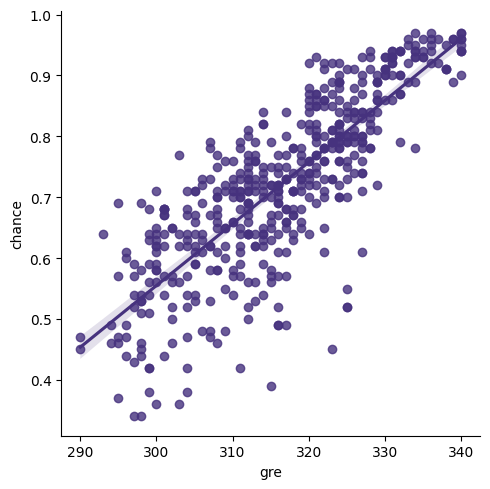

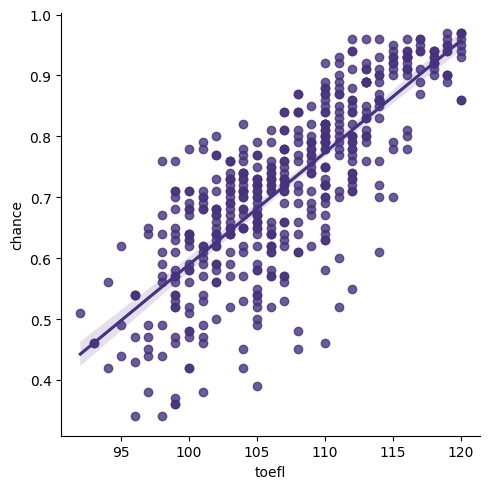

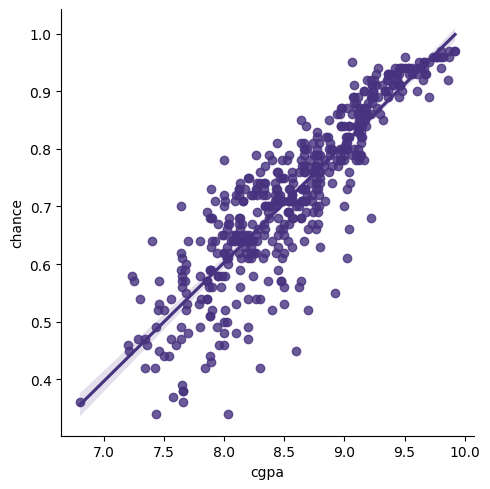

In [70]:
var=["gre","toefl","cgpa"]
y=df["chance"].values.reshape(-1,1)
for i in range(len(var)):
    x=df[var[i]].values.reshape(-1,1)

    #Conjuntos de entrenamiento y prueba

    x_train,x_test,y_train,y_test=train_test_split(x,y)
    x_esc=StandardScaler().fit(x)
    y_esc=StandardScaler().fit(y)
    x_train=x_esc.transform(x_train)
    x_test=x_esc.transform(x_test)
    y_train=y_esc.transform(y_train)
    y_test=y_esc.transform(y_test)

    #Modelo

    model=LinearRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    #Metricas

    mse=metrics.mean_squared_error(y_test,y_pred)
    r2=metrics.r2_score(y_test,y_pred)
    print("La relacion ",var[i],"/price da un MSE de ",100*round(mse,2),"%, y un R2 Score de ",100*round(r2,2),"%",sep="")
    sbn.lmplot(data=df,x=var[i],y="chance")

De esta forma se pueden apreciar las diferentes correlaciones y podemos ver que la mejor manera de estimar las chances de ser aceptados en la universidad en cuestion es mediante una regresión lineal simple con el feature "cgpa"